# **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)

**Created by:** Vinícius Albano ([@vinialbano](https://github.com/vinialbano)) - CP3013677

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

**Custom CSS Styles**

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>São Paulo Real Estate 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the sale/rent price of apartments in the city of São Paulo, Brazil.</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg/320px-Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg.png">

---



## Before starting this notebook

This jupyter notebook is designed for **experimental and learning purposes.**
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for some steps of the **machine learning pipeline** - see the ***[Machine Learning Project Checklist by xavecoding](https://github.com/xavecoding/IFSP-CMP-D2APR-2021.2/blob/main/cheat-sheets/machine-learning-project-checklist_by_xavecoding.pdf).***
I tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.

For learning purposes, some parts of the notebook may be _overcommented._ Moreover, to simulate a real development scenarion, we will divide our solution and experiments into "**sprints**" in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...).
The **sprint goal** wil be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that complies and summarizes all sprint – the target problem, solutions, and findings – should be created later.

**Conventions**

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals

- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters

---

## 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 💽 2. Get the Data

In the previous sprint, we have removed outliers from the entire dataset, split it into training and testing set, and preprocessed the training set (by fillin in missing and wrong values for `Latitude`, `Longitude` and `Condo`.) <br/>
Both preprocessed training set and (raw) testing set were _saved to disk_. Let's use them here.

### 2.2. Load the Data

In [3]:
import pandas as pd
df_train = pd.read_csv('./datasets/sao-paulo-properties_train_clean_sprint-1.csv')

In [4]:
df_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
0,6000,2200.0,165,3,2,1,2,True,False,True,False,Alto de Pinheiros,rent,-23.541829,-46.718899
1,1500,915.0,86,3,2,1,1,True,True,True,False,Vila Matilde,rent,-23.525410,-46.525949
2,400000,560.0,50,2,2,1,1,True,False,True,False,Guaianazes,sale,-23.493276,-46.617289
3,785000,550.0,67,2,2,1,1,False,False,True,False,Brooklin,sale,-23.618385,-46.684776
4,1700,890.0,47,1,1,0,1,False,False,False,False,Santa Cecília,rent,-23.537651,-46.656300


### Adding the City Regions

Since we have too many districts in the city of São Paulo, let's group them by the administrative regions where they are located.

[Reference: Territorial and Administrative Division of the City of São Paulo](https://pt.wikipedia.org/wiki/Divis%C3%A3o_territorial_e_administrativa_do_munic%C3%ADpio_de_S%C3%A3o_Paulo)

In [5]:
zones = {"Center": ["Bela Vista", "Bom Retiro", "Cambuci", "Consolação", "Liberdade", "República", "Sé", "Santa Cecília"],
         "Center-South": ["Santo Amaro", "Campo Grande", "Campo Belo", "Vila Mariana", "Saúde", "Moema", "Jabaquara", "Brooklin", "Vila Olimpia"],
         "Northeast": [ "Cachoeirinha",  "Santana","Casa Verde", "Jaçanã","Limão", "Mandaqui", "Tremembé", "Tucuruvi","Vila Guilherme", "Vila Maria", "Medeiros"],
         "Northwest": [ "Anhanguera", "Perus", "Jaraguá", "São Domingos", "Pirituba", "Freguesia do Ó","Brasilândia"],
         "South": [ "Grajaú", "Campo Limpo", "Capão Redondo", "Cidade Ademar", "Cidade Dutra", "Jardim Ângela", "Jardim São Luis", "Marsilac", "Parelheiros", "Pedreira", "Socorro", "Vila Andrade"],
         "West": ["Itaim Bibi", "Lapa", "Morumbi", "Pinheiros", "Alto de Pinheiros", "Barra Funda", "Butantã", "Jaguaré", "Jardim Paulista", "Perdizes", "Raposo Tavares", "Rio Pequeno", "Vila Leopoldina", "Vila Madalena", "Vila Sônia"],
         "East-1": ["Penha", "Ermelino Matarazzo", "Itaquera", "São Mateus", "Artur Alvim", "Cangaíba",  "Cidade Líder", "Iguatemi", "José Bonifácio", "Parque do Carmo", "Ponte Rasa", "São Rafael", "Vila Matilde"],
         "East-2": [ "Itaim Paulista",  "Guaianazes", "São Miguel", "Cidade Tiradentes", "Jardim Helena",  "Vila Jacuí", "Vila Curuçá", "Lajeado"],
         "Southeast": ["Mooca", "Aricanduva", "Sapopemba",  "Vila Prudente", "Ipiranga",  "Tatuapé",  "Água Rasa",  "Vila Formosa", "Pari", "Brás", "Belém", "São Lucas", "Cursino", "Sacomã", "Carrão"]
        }
zonesMap = {v: k for k,vv in zones.items() for v in vv}
df_train['District Zone'] = df_train['District'].map(zonesMap)

## 📊 4. Explore the Data
We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

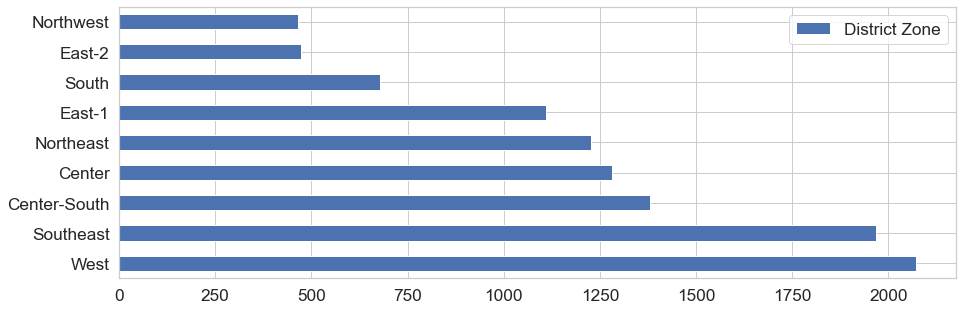

In [6]:
df_train[['District Zone']].apply(pd.value_counts).plot.barh()
display()

## 🛠️ 5. Prepare the Data (Preprocessing)

In [7]:
df_train_pre = pd.get_dummies(data=df_train, columns=['Negotiation Type', 'District', 'District Zone'], drop_first=True)
df_train_pre.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_Vila Sônia,District_Água Rasa,District Zone_Center-South,District Zone_East-1,District Zone_East-2,District Zone_Northeast,District Zone_Northwest,District Zone_South,District Zone_Southeast,District Zone_West
0,6000,2200.0,165,3,2,1,2,True,False,True,...,0,0,0,0,0,0,0,0,0,1
1,1500,915.0,86,3,2,1,1,True,True,True,...,0,0,0,1,0,0,0,0,0,0
2,400000,560.0,50,2,2,1,1,True,False,True,...,0,0,0,0,1,0,0,0,0,0
3,785000,550.0,67,2,2,1,1,False,False,True,...,0,0,1,0,0,0,0,0,0,0
4,1700,890.0,47,1,1,0,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train_pre['Parkings per Room'] = df_train_pre['Parking'] / df_train_pre['Rooms']
df_train_pre['Parkings per Meter'] = df_train_pre['Parking'] / df_train_pre['Size']
df_train_pre['Parkings per Condo'] = df_train_pre['Parking'] / df_train_pre['Condo']
df_train_pre['Parkings per Toilet'] = df_train_pre['Parking'] / df_train_pre['Toilets']
df_train_pre['Condo per Room'] = df_train_pre['Condo'] / df_train_pre['Rooms']
df_train_pre['Condo per Meter'] = df_train_pre['Condo'] / df_train_pre['Size']
df_train_pre['Condo per Toilet'] = df_train_pre['Condo'] / df_train_pre['Toilets']
df_train_pre['Meters per Room'] = df_train_pre['Size'] / df_train_pre['Rooms']
df_train_pre['Meters per Condo'] = df_train_pre['Size'] / df_train_pre['Condo']
df_train_pre['Meters per Toilet'] = df_train_pre['Size'] / df_train_pre['Toilets']
df_train_pre['Suites per Room'] = df_train_pre['Suites'] / df_train_pre['Rooms']
df_train_pre['Suites per Condo'] = df_train_pre['Suites'] / df_train_pre['Condo']
df_train_pre['Suites per Meter'] = df_train_pre['Suites'] / df_train_pre['Size']
df_train_pre['Suites per Toilet'] = df_train_pre['Suites'] / df_train_pre['Toilets']
df_train_pre['Toilets per Room'] = df_train_pre['Toilets'] / df_train_pre['Rooms']
df_train_pre['Toilets per Condo'] = df_train_pre['Toilets'] / df_train_pre['Condo']
df_train_pre['Toilets per Meter'] = df_train_pre['Toilets'] / df_train_pre['Size']
df_train_pre['Rooms per Meter'] = df_train_pre['Rooms'] / df_train_pre['Size']
df_train_pre['Rooms per Condo'] = df_train_pre['Rooms'] / df_train_pre['Condo']
df_train_pre['Rooms per Toilet'] = df_train_pre['Rooms'] / df_train_pre['Toilets']

In [9]:
df_train_pre.corr()["Price"].sort_values(ascending=False).head(20)

Price                    1.000000
Negotiation Type_sale    0.519719
Size                     0.373403
Toilets                  0.330907
Parking                  0.320248
Suites                   0.299491
Meters per Room          0.277242
Rooms                    0.271538
Condo                    0.265861
Suites per Toilet        0.158427
Suites per Room          0.153850
Meters per Toilet        0.150826
Condo per Room           0.141565
Swimming Pool            0.126455
Parkings per Room        0.124906
Condo per Toilet         0.119627
Elevator                 0.115420
District_Moema           0.108503
District_Brooklin        0.103215
District_Iguatemi        0.085465
Name: Price, dtype: float64

In [10]:
mask_sale = df_train_pre['Negotiation Type_sale'].eq(1)
mask_rent = df_train_pre['Negotiation Type_sale'].eq(0)

In [11]:
# Correlation of the apartments for rent
df_train_pre[mask_rent].corr()["Price"].sort_values(ascending=False).head(20)

Price                         1.000000
Size                          0.731041
Condo                         0.730616
Meters per Room               0.651049
Parking                       0.644991
Suites                        0.586416
Toilets                       0.582120
Condo per Room                0.553594
Condo per Toilet              0.413566
Rooms                         0.396952
Parkings per Room             0.370921
Suites per Room               0.370075
Suites per Toilet             0.323754
Meters per Toilet             0.309570
District Zone_West            0.231487
District_Itaim Bibi           0.218699
District_Moema                0.208866
District Zone_Center-South    0.203450
Swimming Pool                 0.202191
Toilets per Room              0.196192
Name: Price, dtype: float64

In [12]:
# Correlation of the apartments for sale
df_train_pre[mask_sale].corr()["Price"].sort_values(ascending=False).head(20)

Price                         1.000000
Size                          0.824281
Condo                         0.744623
Parking                       0.688795
Meters per Room               0.645978
Toilets                       0.626799
Suites                        0.610914
Condo per Room                0.536189
Rooms                         0.486552
Condo per Toilet              0.397634
Parkings per Room             0.368641
Suites per Room               0.351718
Meters per Toilet             0.331347
Suites per Toilet             0.308979
District Zone_West            0.302897
District Zone_Center-South    0.223058
Toilets per Room              0.206438
District_Iguatemi             0.204898
Condo per Meter               0.194252
District_Moema                0.193492
Name: Price, dtype: float64

### 5.2. Separating the independent variables (features) and the dependent variable (target outcome)

In [13]:
df_train_target = df_train_pre['Price'].copy()
df_train_pre = df_train_pre.drop(columns=['Price'])

### 5.3. Feature Scaling

With few exceptions, ML algorithms **don’t perform well** when the _input numerical attributes_ have **very different scales**. </br>
For example, compare the scale of the attributes: `Size` and `Price`.

Although **feature scaling** _is not_ necessarily for the [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) implementation from sklearn, we intend to evaluate other regression methods soon that may need that. So, we will perform it.

In [14]:
df_train_pre.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,...,Suites per Room,Suites per Condo,Suites per Meter,Suites per Toilet,Toilets per Room,Toilets per Condo,Toilets per Meter,Rooms per Meter,Rooms per Condo,Rooms per Toilet
0,2200.0,165,3,2,1,2,True,False,True,False,...,0.333333,0.000455,0.006061,0.5,0.666667,0.000909,0.012121,0.018182,0.001364,1.5
1,915.0,86,3,2,1,1,True,True,True,False,...,0.333333,0.001093,0.011628,0.5,0.666667,0.002186,0.023256,0.034884,0.003279,1.5
2,560.0,50,2,2,1,1,True,False,True,False,...,0.500000,0.001786,0.020000,0.5,1.000000,0.003571,0.040000,0.040000,0.003571,1.0
3,550.0,67,2,2,1,1,False,False,True,False,...,0.500000,0.001818,0.014925,0.5,1.000000,0.003636,0.029851,0.029851,0.003636,1.0
4,890.0,47,1,1,0,1,False,False,False,False,...,0.000000,0.000000,0.000000,0.0,1.000000,0.001124,0.021277,0.021277,0.001124,1.0


In [15]:
df_train_pre.columns

Index(['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator',
       'Furnished', 'Swimming Pool', 'New',
       ...
       'Suites per Room', 'Suites per Condo', 'Suites per Meter',
       'Suites per Toilet', 'Toilets per Room', 'Toilets per Condo',
       'Toilets per Meter', 'Rooms per Meter', 'Rooms per Condo',
       'Rooms per Toilet'],
      dtype='object', length=136)

In [16]:
numeric_variables = [col for col in df_train_pre if (not col.startswith('District') and not col.startswith('Negotiation Type'))]
dummy_variables = [col for col in df_train_pre if (col.startswith('District') or col.startswith('Negotiation Type'))]

In [17]:
X_train_numeric = df_train_pre[numeric_variables].values
X_train_dummy = df_train_pre[dummy_variables].values

In [20]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# learn the median and IQR for each feature from our training (numeric) set
scaler.fit(X_train_numeric)

RobustScaler()

In [21]:
# aplying feature scaling
X_train_numeric_norm = scaler.transform(X_train_numeric)

In [22]:
X_train_numeric_norm

array([[ 3.22390985,  2.27272727,  1.        , ..., -0.83778966,
        -0.79918147,  1.        ],
       [ 0.7055365 ,  0.47727273,  1.        , ...,  0.19379845,
        -0.16411637,  1.        ],
       [ 0.00979912, -0.34090909,  0.        , ...,  0.50980392,
        -0.06703861,  0.        ],
       ...,
       [-0.05487506,  0.22727273,  1.        , ...,  0.50980392,
         0.63637914,  1.        ],
       [-0.69573738, -0.47727273,  0.        , ...,  0.84670232,
         2.06478912,  0.        ],
       [ 2.53797158,  2.88636364,  2.        , ..., -0.67401961,
        -0.53437622, -0.66666667]])

In [23]:
# our final normalized training set
X_train = np.hstack((X_train_numeric_norm, X_train_dummy))

In [24]:
X_train

array([[ 3.22390985,  2.27272727,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.7055365 ,  0.47727273,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00979912, -0.34090909,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05487506,  0.22727273,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69573738, -0.47727273,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.53797158,  2.88636364,  2.        , ...,  0.        ,
         0.        ,  0.        ]])

## 🏋️‍ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [26]:
# we already have X_train
y_train = df_train_target.values

In [27]:
y_train

array([  6000,   1500, 400000, ...,   2150,    900,   3500])

### 6.2. Training the Models

#### **→ Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

#### **→ Decision Tree Regression**

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()  # default hyperparameters
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

### 6.3. Evaluating on the Training Set

#### **→ Linear Regression**

##### **Prediction**

In [33]:
y_train_pred_lin_reg = lin_reg.predict(X_train)

#### **Evaluation**

Since our dataset has two `Negotiation Type`s, let's evaluate the model's ability to predict the correct prices of each type.

In [37]:
mask_train_sale = df_train_pre['Negotiation Type_sale'].eq(1)
mask_train_rent = df_train_pre['Negotiation Type_sale'].eq(0)

X_train_sale = X_train[mask_train_sale]
X_train_rent = X_train[mask_train_rent]

y_train_sale = y_train[mask_train_sale]
y_train_rent = y_train[mask_train_rent]

y_train_pred_sale_lin_reg = y_train_pred_lin_reg[mask_train_sale]
y_train_pred_rent_lin_reg = y_train_pred_lin_reg[mask_train_rent]

In [36]:
lin_reg_r2_score = lin_reg.score(X_train, y_train)
print(f'General R2 linear regression = {lin_reg_r2_score}')

lin_reg_r2_score_sale = lin_reg.score(X_train_sale, y_train_sale)
print(f'R2 Sale linear regression = {lin_reg_r2_score_sale}')

lin_reg_r2_score_rent = lin_reg.score(X_train_rent, y_train_rent)
print(f'R2 Rent linear regression = {lin_reg_r2_score_rent}')

General R2 linear regression = 0.5310825075288852
R2 Sale linear regression = 0.5302382951529476
R2 Rent linear regression = -6224.205024719453


In [39]:
from sklearn.metrics import mean_squared_error

lin_reg_rmse = mean_squared_error(y_train, y_train_pred_lin_reg, squared=False)
print(f'General RMSE linear regression = {lin_reg_rmse}')

lin_reg_rmse_sale = mean_squared_error(y_train_sale, y_train_pred_sale_lin_reg, squared=False)
print(f'RMSE Sale linear regression = {lin_reg_rmse_sale}')

lin_reg_rmse_rent = mean_squared_error(y_train_rent, y_train_pred_rent_lin_reg, squared=False)
print(f'RMSE Rent linear regression = {lin_reg_rmse_rent}')

General RMSE linear regression = 399074.96769528923
RMSE Sale linear regression = 497427.87676990544
RMSE Rent linear regression = 284380.1740623081


#### **Visual Analysis**

##### **Prediction vs Real**

Text(0.5, 1.0, 'General Apartment Prices - Prediction vs Real - Linear Regression')

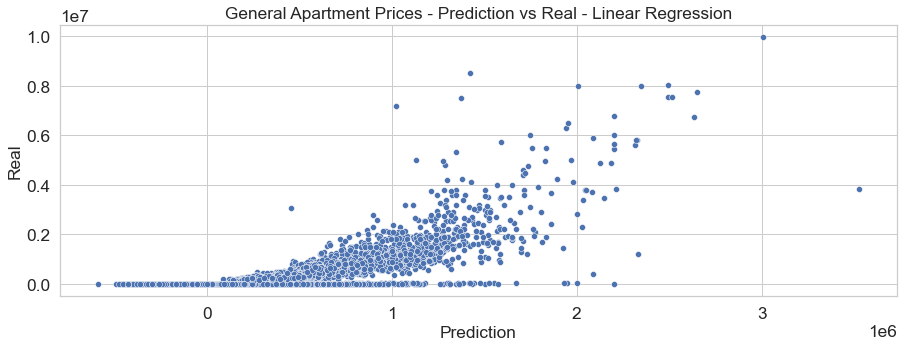

In [40]:
sns.scatterplot(x=y_train_pred_lin_reg, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('General Apartment Prices - Prediction vs Real - Linear Regression')

Text(0.5, 1.0, 'Apartment Sale Prices - Prediction vs Real - Linear Regression')

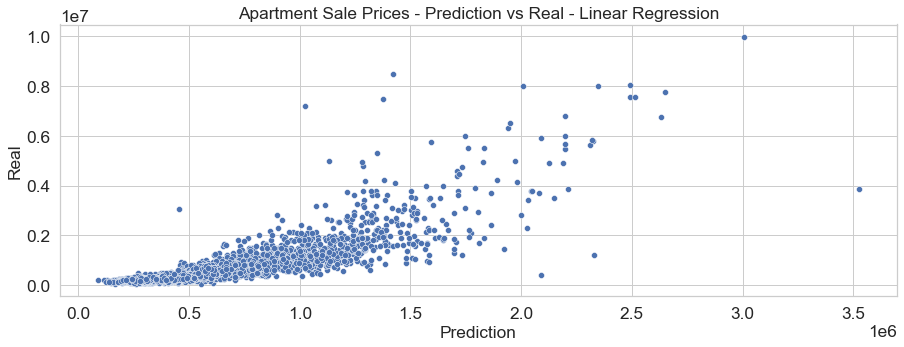

In [41]:
sns.scatterplot(x=y_train_pred_sale_lin_reg, y=y_train_sale)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Sale Prices - Prediction vs Real - Linear Regression')

Text(0.5, 1.0, 'Apartment Rent Prices - Prediction vs Real - Linear Regression')

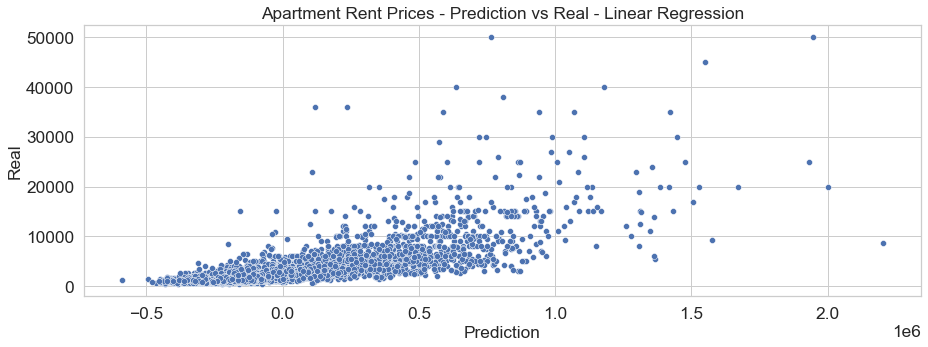

In [42]:
sns.scatterplot(x=y_train_pred_rent_lin_reg, y=y_train_rent)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Rent Prices - Prediction vs Real - Linear Regression')

##### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity**.

<img src='./imgs/residual-analysis.png' width=600/>

In [43]:
residual_lin_reg = y_train - y_train_pred_lin_reg
residual_sale_lin_reg = y_train_sale - y_train_pred_sale_lin_reg
residual_rent_lin_reg = y_train_rent - y_train_pred_rent_lin_reg

Text(0.5, 1.0, 'General Apartment Price - Prediction vs Residual - Linear Regression')

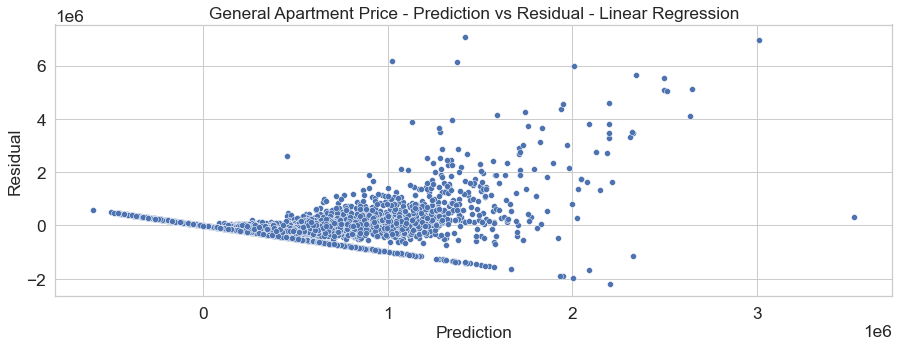

In [44]:
sns.scatterplot(x=y_train_pred_lin_reg, y=residual_lin_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('General Apartment Price - Prediction vs Residual - Linear Regression')

Text(0.5, 1.0, 'Apartment Sales Price - Prediction vs Residual - Linear Regression')

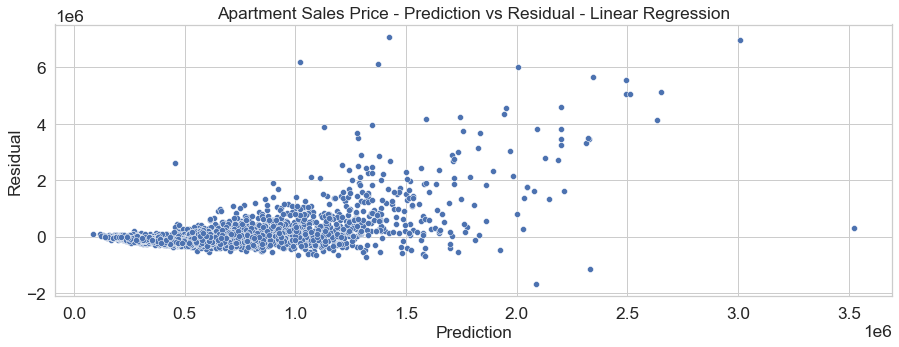

In [45]:
sns.scatterplot(x=y_train_pred_sale_lin_reg, y=residual_sale_lin_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Sales Price - Prediction vs Residual - Linear Regression')

Text(0.5, 1.0, 'Apartment Rent Price - Prediction vs Residual - Linear Regression')

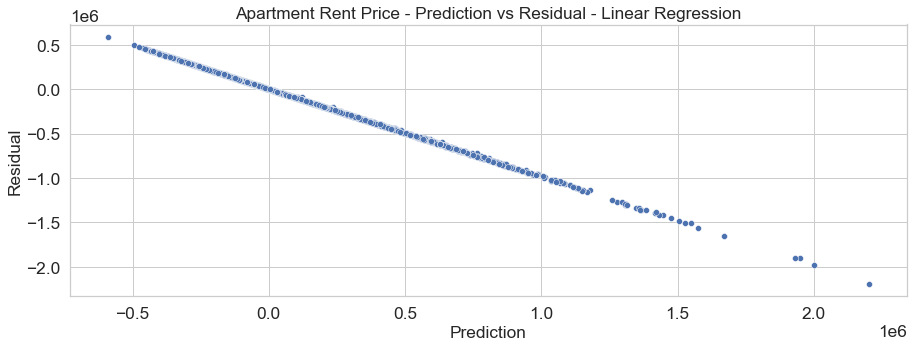

In [46]:
sns.scatterplot(x=y_train_pred_rent_lin_reg, y=residual_rent_lin_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Rent Price - Prediction vs Residual - Linear Regression')

#### **→ Decision Tree**

##### **Prediction**

In [48]:
y_train_pred_tree_reg = tree_reg.predict(X_train)

y_train_pred_sale_tree_reg = y_train_pred_tree_reg[mask_train_sale]
y_train_pred_rent_tree_reg = y_train_pred_tree_reg[mask_train_rent]

##### **Evaluation**

In [53]:
from sklearn.metrics import r2_score

tree_reg_r2 = r2_score(y_train, y_train_pred_tree_reg)
print(f'R² General decision tree regression = {tree_reg_r2}')

tree_reg_r2_score_sale = r2_score(y_train_sale, y_train_pred_sale_tree_reg)
print(f'R² Sale decision tree regression = {tree_reg_r2_score_sale}')

tree_reg_r2_score_rent = r2_score(y_train_rent, y_train_pred_rent_tree_reg)
print(f'R² Rent decision tree regression = {tree_reg_r2_score_rent}')

R² General decision tree regression = 0.9998857796450301
R² Sale decision tree regression = 0.9998435093106487
R² Rent decision tree regression = 0.9998937586568348


In [55]:
from sklearn.metrics import mean_squared_error

tree_reg_rmse = mean_squared_error(y_train, y_train_pred_tree_reg, squared=False)
print(f'RMSE general = {tree_reg_rmse}')

tree_reg_rmse_sale = mean_squared_error(y_train_sale, y_train_pred_sale_tree_reg, squared=False)
print(f'RMSE sale = {tree_reg_rmse_sale}')

tree_reg_rmse_rent = mean_squared_error(y_train_rent, y_train_pred_rent_tree_reg, squared=False)
print(f'RMSE rent = {tree_reg_rmse_rent}')

RMSE general = 6228.421898228392
RMSE sale = 9078.948871948269
RMSE rent = 37.15089306334221


#### **Visual Analysis**

Text(0.5, 1.0, 'Median housing value - Prediction vs Real - Decision Tree Regression')

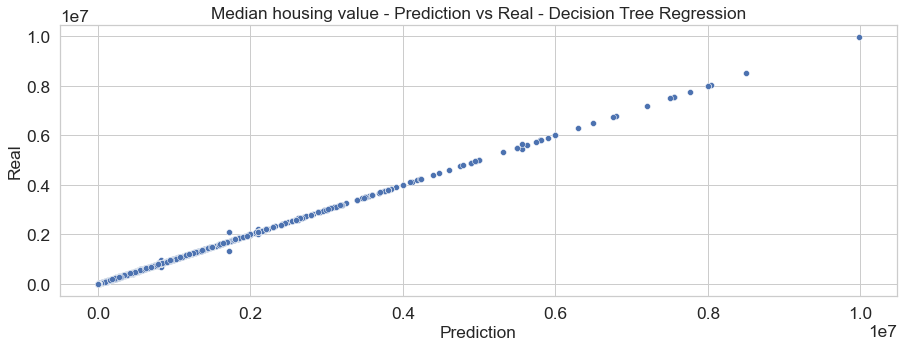

In [56]:
sns.scatterplot(x=y_train_pred_tree_reg, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('General Apartment Prices - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'Apartment Sale Prices - Prediction vs Real - Decision Tree Regression')

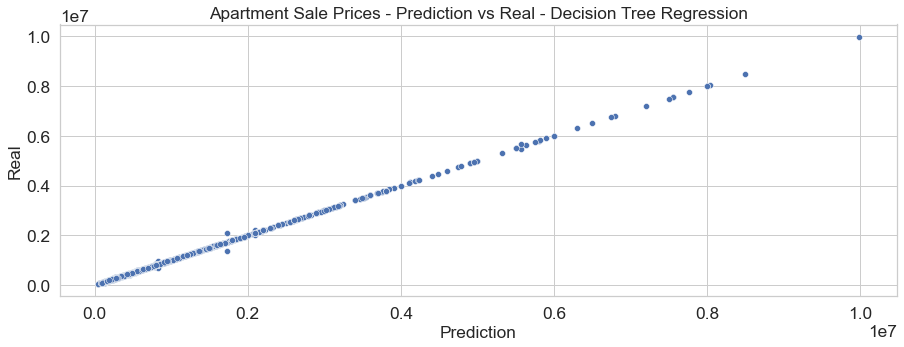

In [57]:
sns.scatterplot(x=y_train_pred_sale_tree_reg, y=y_train_sale)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Sale Prices - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'Apartment Rent Prices - Prediction vs Real - Decision Tree Regression')

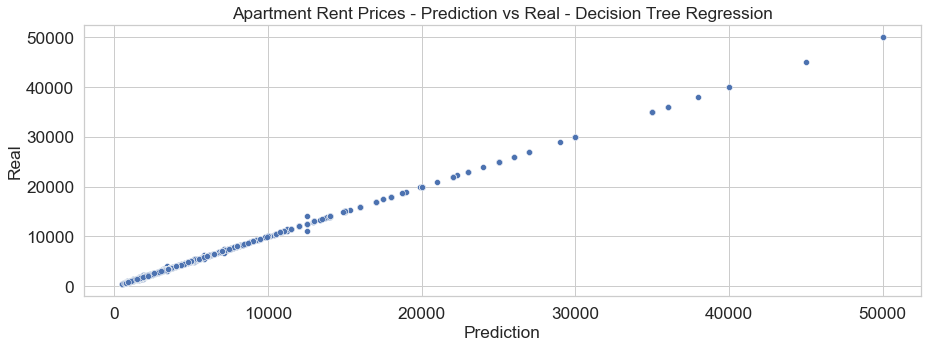

In [58]:
sns.scatterplot(x=y_train_pred_rent_tree_reg, y=y_train_rent)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Rent Prices - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'General Apartment Prices - Prediction vs Residual |')

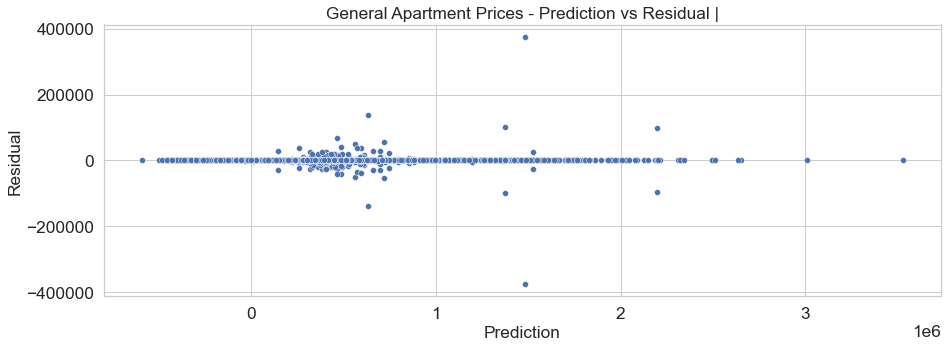

In [59]:
residual_tree_reg = y_train - y_train_pred_tree_reg

sns.scatterplot(x=y_train_pred_lin_reg, y=residual_tree_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('General Apartment Prices - Prediction vs Residual |')

Text(0.5, 1.0, 'Apartment Sale Prices - Prediction vs Residual |')

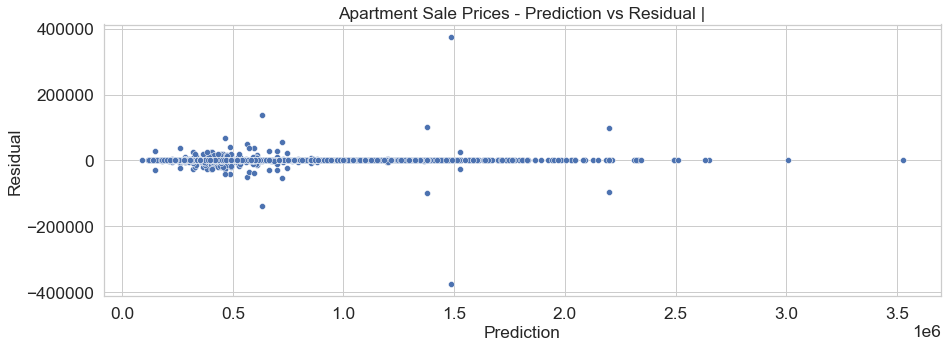

In [60]:
residual_tree_reg_sale = y_train_sale - y_train_pred_sale_tree_reg

sns.scatterplot(x=y_train_pred_sale_lin_reg, y=residual_tree_reg_sale)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Sale Prices - Prediction vs Residual |')

Text(0.5, 1.0, 'Apartment Rent Prices - Prediction vs Residual |')

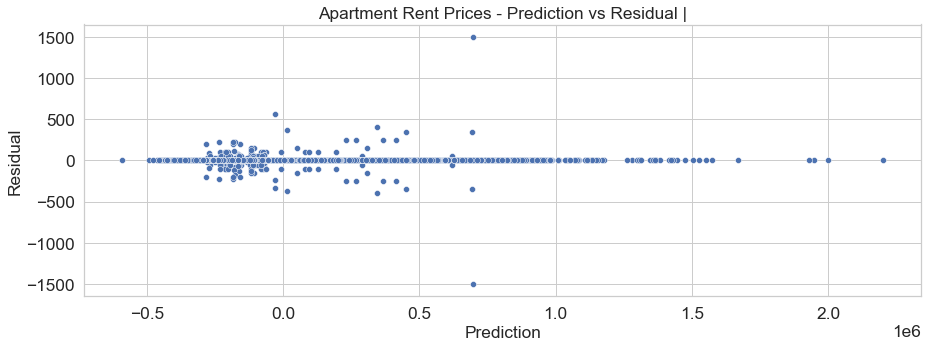

In [61]:
residual_tree_reg_rent = y_train_rent - y_train_pred_rent_tree_reg

sns.scatterplot(x=y_train_pred_rent_lin_reg, y=residual_tree_reg_rent)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Rent Prices - Prediction vs Residual |')

<h3 style="color: #ff5757 !important"><b>Cross-validation</b></h3>

#### **→ Decision Tree**

The following code ***randomly splits*** (_no stratification_) the _training set_ into **10 folds**, then it trains and evaluates the Decision Tree model 10 times, picking a different fold (**validation set**) for evaluation every time and training on the other 9 folds (**train-dev set**). <br/>
The result is an _array_ containing the 10 evaluation scores.

In [65]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=27)
tree_neg_mse_scores = cross_val_score(tree_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

tree_rmse_scores = np.sqrt(-tree_neg_mse_scores)

In [63]:
# printing function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [66]:
display_scores(tree_rmse_scores)

Scores: [181515.4624081  226937.61722755 181302.69455587 181709.59037405
 227616.62133283 208693.9806532  213021.61186189 286713.33752813
 158063.75611877 260115.72771011]
Mean: 212569.03997705193
Standard deviation: 37511.61370930972


In [68]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_neg_mse_scores = cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

lin_rmse_scores = np.sqrt(-lin_neg_mse_scores)

In [69]:
display_scores(lin_rmse_scores)

Scores: [391222.92381511 394974.21545283 421531.92965134 371247.19239913
 308114.49819565 486586.16872947 466501.83177041 384139.08786562
 307543.52637238 493899.61561616]
Mean: 402576.0989868092
Standard deviation: 62694.33005015158
